# 1. Importing Necessary Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Reading Data into Dataframe

Since the dataset is not a CSV file, but rather an XLSX file, the `openpyxl` library is required to convert the dataset into Pandas Dataframe

In [17]:
!pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [18]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

# 3. Data Preprocessing

In [19]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [20]:
df.sample(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
100091,56281595,Cozy NYC apt!,55024337073,verified,Marina,Manhattan,Upper West Side,40.79530,-73.97248,United States,...,38.0,2.0,2.0,2017-04-16,0.07,4.0,1.0,0.0,NaN,NaN
6378,4523905,2 Bedroom New York Charmer,10614969129,verified,Lee,Manhattan,Hell's Kitchen,40.76198,-73.98718,United States,...,131.0,2.0,9.0,2016-07-12,0.21,2.0,1.0,122.0,"I'm pretty easy going, but I expect my guests ...",NaN
21101,12655418,Twin bed-Close to Columbia U & Central Park,36326587999,verified,Jaleh,Manhattan,Harlem,40.80172,-73.95538,United States,...,117.0,1.0,226.0,2019-07-03,7.75,1.0,2.0,32.0,NaN,NaN
94737,53324581,"Private Room In Brooklyn,",45549176194,unconfirmed,Nessim,Brooklyn,Bensonhurst,40.60997,-73.98022,United States,...,44.0,2.0,2.0,2018-07-02,0.14,2.0,1.0,0.0,Please respect all personal property/possessio...,NaN
41013,23652816,beautiful 1 bedroom apt,13268156775,verified,Jess,Queens,Queens Village,40.72684,-73.74896,United States,...,99.0,1.0,0.0,NaT,NaN,2.0,1.0,0.0,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

The column *house_rules* is irrelevant to our analysis and *license* contains only 2 entries thus they are dropped.

In [22]:
df.drop(['house_rules', 'license'], axis = 1, inplace=True)

## Looking for duplicates

In [23]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [24]:
df.duplicated().sum()

541

**541 duplicate** entries were discovered in the given dataset. Therefore, all duplicates have been dropped.

In [25]:
df = df.drop_duplicates()

In [26]:
df.duplicated().sum()

0

## Checking null values

In [27]:
df.isna().sum()

id                                    0
NAME                                270
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      400
number of reviews                   183
last review                       15832
reviews per month                 15818
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

In [28]:
df.dropna(inplace = True)

## Inspecting Important Columns

In [29]:
df['neighbourhood group'].value_counts()

neighbourhood group
Brooklyn         34621
Manhattan        34561
Queens           11124
Bronx             2267
Staten Island      816
brookln              1
Name: count, dtype: int64

In the column *neighbourhood group*, there are **two errors** relating to Manhattan and Brooklyn. Thus, I'll replace them with the correct value.

In [30]:
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln':'Brooklyn', 'manhatan':'Manhattan'})

In [31]:
df['country'].value_counts()

country
United States    83390
Name: count, dtype: int64

In [32]:
df['room type'].value_counts()

room type
Entire home/apt    44162
Private room       37474
Shared room         1646
Hotel room           108
Name: count, dtype: int64

In [33]:
df['price'].sample(10)

76449      792.0
5585      1093.0
83824      792.0
53865      515.0
31528      383.0
15676      404.0
73105      615.0
71173      863.0
73934      956.0
101394     670.0
Name: price, dtype: float64

In [34]:
df['service fee'].sample(20)

52367    195.0
32805    126.0
8676     236.0
69792     27.0
13362    114.0
51325    176.0
94022     43.0
96195     49.0
98184     26.0
88598     16.0
63838    237.0
50186     81.0
44921    144.0
9302     194.0
537       51.0
50325    142.0
38910    191.0
14826     54.0
76900     83.0
50366    176.0
Name: service fee, dtype: float64

The values in price and service fee, have dtype **float64** and are purely numerical thus no formatting is required. However their names must contain the currency.

In [35]:
df.rename(columns = {'price':'price_$', 'service fee':'service_fee_$'}, inplace = True)

In [37]:
df['availability 365'].sample(20)

88194      52.0
60191     361.0
22742     291.0
89461       0.0
38857       8.0
76669      89.0
64761       0.0
94514       0.0
9971      379.0
18351     141.0
21554      89.0
57168     293.0
22581     319.0
101051      0.0
53975     335.0
56236       0.0
28128      18.0
89824       7.0
56218     155.0
64054       0.0
Name: availability 365, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a08137a680>,
 'caps': [<matplotlib.lines.Line2D at 0x1a08137ac20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a08137a320>],
 'medians': [<matplotlib.lines.Line2D at 0x1a08137b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a08137b520>],
 'means': []}

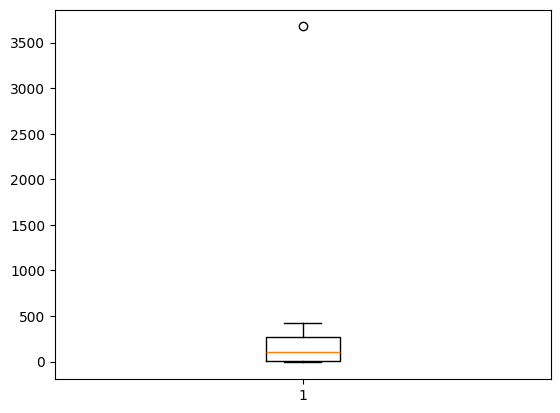

In [38]:
plt.boxplot(df['availability 365'])

In [39]:
#removing the outliers i.e values greater than 500 as seen in the plot
df = df.drop(df[df['availability 365'] > 500].index)

## Converting features into appropriate dtypes

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  int64         
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  int64         
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [41]:
df['last review'].sample(5)

64173   2021-08-31
29196   2017-12-25
85637   2019-06-23
28155   2018-01-02
99515   2019-06-02
Name: last review, dtype: datetime64[ns]

In [42]:
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['Construction year'] = df['Construction year'].astype(int)

# 4. Exploratory Data Analysis

In [43]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


## Types of Rooms

> What are the different propery types in the AirBnB open Dataset?

In [44]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property Types and their Count')

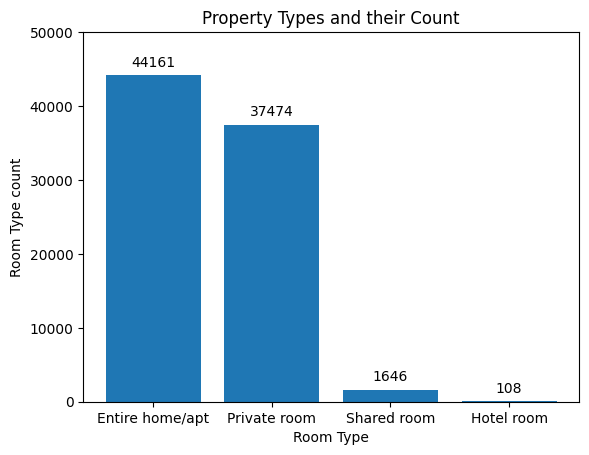

In [45]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:, 'count'])
plt.bar_label(room_type_bar, labels = property_types.loc[:, 'count'], padding = 4)
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type count')
plt.title('Property Types and their Count')

There are four distinct room or property types as per the given AirBnB Open Dataset which are

- Entire home/apt
- Private Room
- Shared Room
- Hotel Room

## Neighbourhood Group with Highest Listing

> Which Neighbourhood Group has the Highest Listing?

In [46]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'Neighbourhood Group with the Highest Listing')

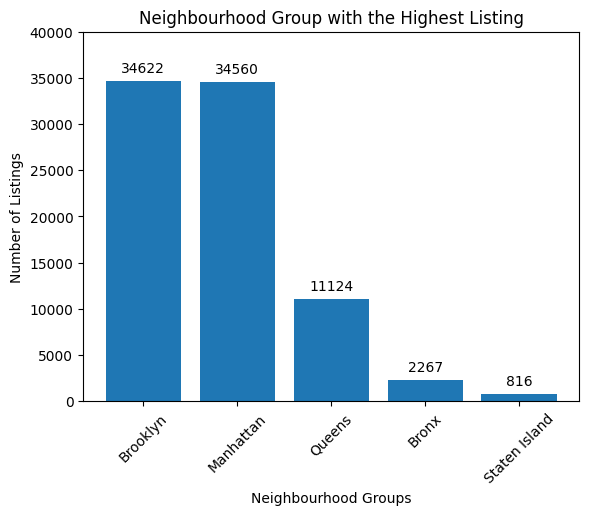

In [47]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, 'count'])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, 'count'], padding = 4)
plt.ylim([0, 40000])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 45)
plt.title('Neighbourhood Group with the Highest Listing')

Brooklyn has the Highest Number of Listings, with Manhattan being a close second. Following next are Queens, Bronx, and Staten Island.

## Neighbourhood Group with highest Average Price

> Which Neighbourhood Group has highest Average Price?

In [48]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price

,price_$
neighbourhood group,
Queens,630.502517
Bronx,630.201147
Brooklyn,627.434261
Manhattan,623.435561
Staten Island,622.132353


Text(0.5, 1.0, 'Average Price per Listing ($) in each Neighbourhood Group')

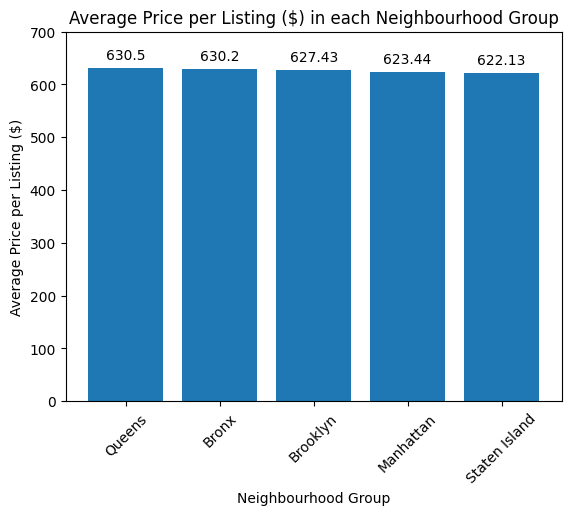

In [49]:
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$'])
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, 'price_$'], 2), label_type = 'edge', padding = 4)
plt.ylim([0, 700])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation = 45)
plt.title('Average Price per Listing ($) in each Neighbourhood Group')

There is no major difference among the Average Price per Listing ($) of each Neighbourhood group. Regardless, Queens has the  highest average price per listing, followed by Bronx, Brooklyn, Manhattan, and Staten Island.

## Relation between Construction Year and Price of Property

> Is there a Relation between Construction Year and Price of Property?

Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

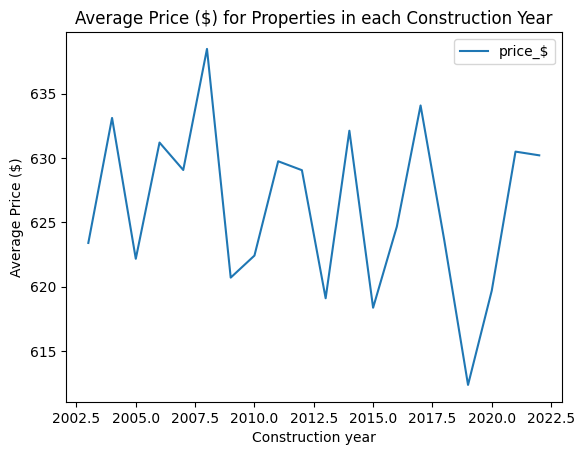

In [50]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')

The line plot shows a noticeable downward trend as the Construction Year Progresses, with periodic lows and highs.

## Top 10 Hosts

> Which are the Top 10 Hosts by Calculated Host Listings Counts?

In [51]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts

,calculated host listings count
host name,
Sonder (NYC),111921.0
Karen,42410.0
Jeniffer,31447.0
Blueground,21168.0
Kaz,17552.0
Corporate Housing,14833.0
Soya,10260.0
Stay With Vibe,10260.0
Kara,10092.0


Text(0.5, 1.0, 'Top 10 Hosts by Calculated Host Listings Counts')

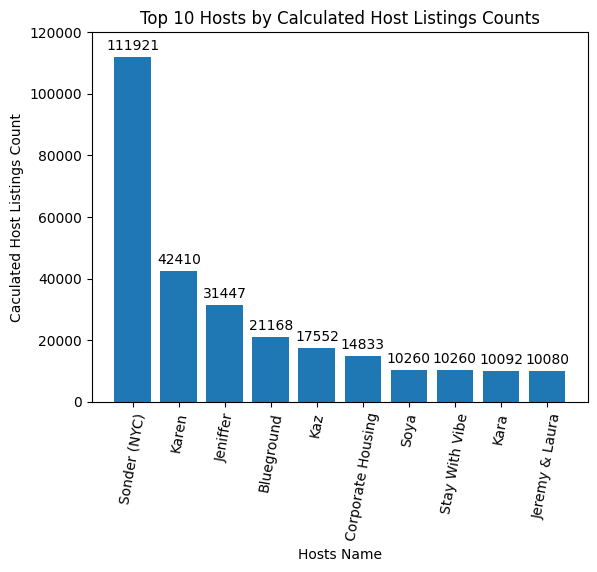

In [52]:
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3)
plt.xlabel('Hosts Name')
plt.ylabel('Caculated Host Listings Count')
plt.xticks(rotation = 80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Counts')

The Highest Calculated Host Listing belonged to Sonder (NYC) with 111921 Listings with the second highest, Karen trailing far behind at 42410 listings. The remaining contenders follow each other closely.

## Relation between Verified Identities and Positive Reviews

> Are hosts with verified identities more likely to receive positive reviews?

In [53]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


Text(0.5, 1.0, 'Average Review Rate for each verification statistics')

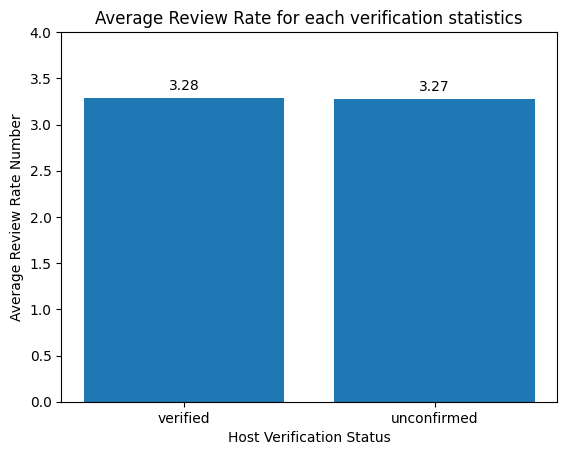

In [54]:
review_bar = plt.bar(review.index, review.loc[:, 'review rate number'])
plt.bar_label(review_bar, labels = round(review.loc[:, 'review rate number'], 2), padding = 4)
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each verification statistics')

Text(0.5, 1.0, 'Average Review Rate for each verification status')

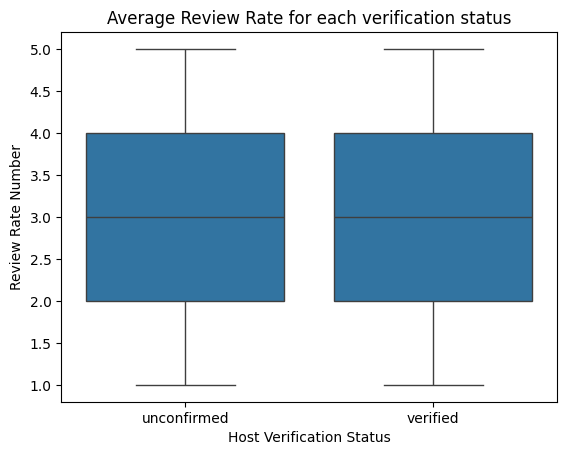

In [55]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each verification status')

There is no visible relation between Average Review Rate and the Verification Status. Hosts have similar Average Review Rates irrespective of thier verification status. Thus, Verification Status does not influence the Review Rate. Precisely speaking, Verified Hosts have a marginally higher Average Review Rate of 3.28 as compared to 3.27 of Unverified Hosts, but it is too small to represent a relation.

## Correlation between Price and Service Fee of Listing

> Is there a Correlation between Price and Service Fee of Listing?

In [56]:
df['price_$'].corr(df['service_fee_$'])

0.999990908297647

Text(0.5, 1.0, 'A Regression Plot showing the correlation between Price and Service Fee of a Listing')

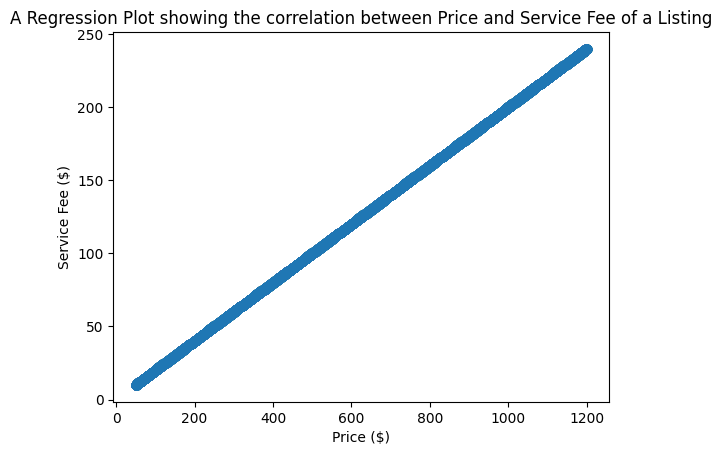

In [57]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the correlation between Price and Service Fee of a Listing')

A Pearson Correlation Coefficent of 0.99~ between the Price and Service Fee of Listings indicates a h  igh ly robust postive correlation between these two variables. The Regression Line Plot shows the increase of Service Fee with increase of Listing Price, represented in the form of a straight diagonal rising towards the right.

## Average Review Rate Number

> What is the average review rate number for listings, and does it vary based on the neighbourhood group and room type?

In [58]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review Rate for each Room or Property Type in each Neighbourhood Group')

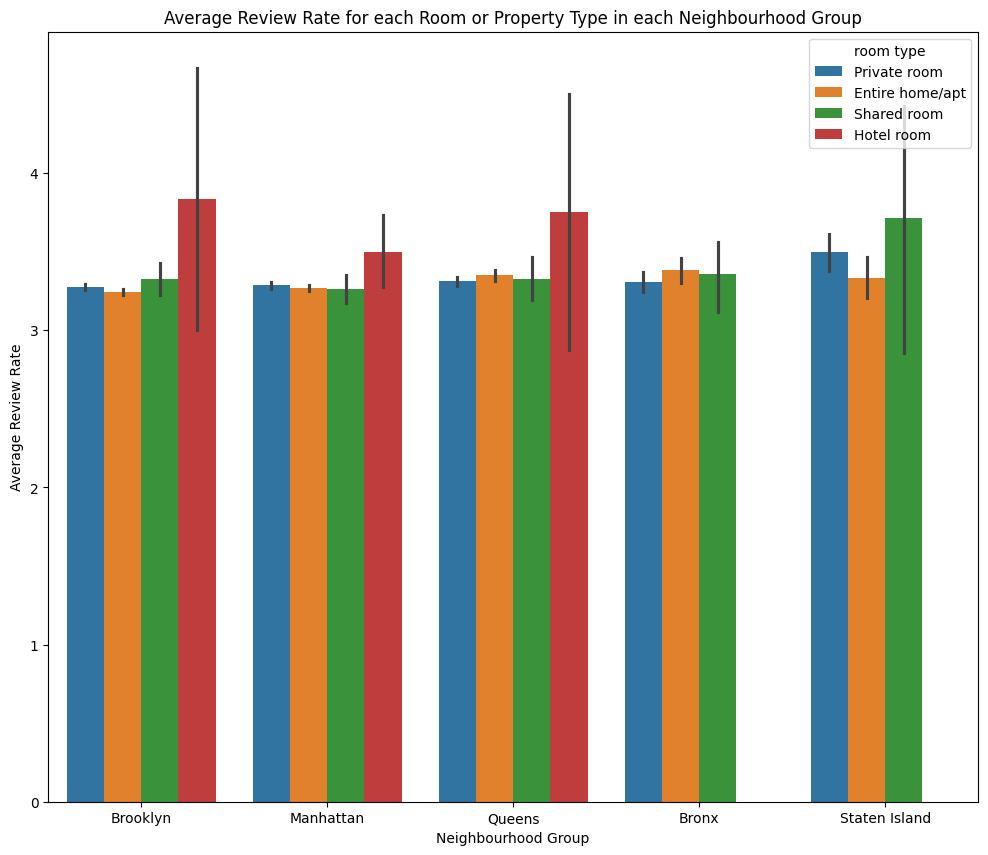

In [59]:
plt.figure(figsize = [12, 10])
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room or Property Type in each Neighbourhood Group')

In each of the three Neighbourhood Groups containing Hotel Groups i.e. Brooklyn, Manhattan, and Queens, Hotel Rooms have a Higher Review Rate as compared to the other Property Types.

## Hosts with Higher Calculated Listings Counts and likelihood of Higher Availability throughout the year

> Are hosts with a higher calculated host listings count more likely to maintain a higher availability throughout the year?

Text(0.5, 1.0, 'A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

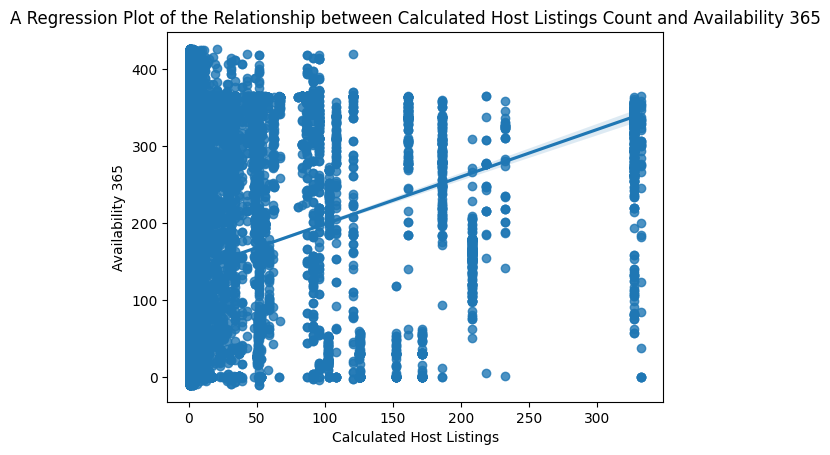

In [60]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

In [61]:
df['calculated host listings count'].corr(df['availability 365'])

0.1359971471570339

With a Pearson Correlation Coefficient value of 0.136~ between Calculated Host Listings and Availbility 365, it is indicated that there is a weak positive correlation between the two variables.

# Conclusion

In conclusion, this project has provided a **comprehensive analysis of the New York City AirBnB Dataset**, shedding light on the various aspects of the short-term lodging market. Through *Data Wrangling, Exploratory Data Analysis (EDA), and Interpretation of Summary Statistics*, we've uncovered valuable insights into **listing distribution, pricing dynamics, host, and review analysis**.

Key findings include the dominance in counts of `Entire home/apt` listings, the variability in `Listing Counts` across neighbourhood groups, and the downward trend between `Property Construction Year` and `Price`. Additionally, the analysis highlighted the significance of `Verified Host status` on `Review Rates`, as well as the strong correlation between `Listing Price` and `Service Fee`.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for AirBnB. Lastly, expanding the analytics to include predictive modelling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behaviour, facilitating strategic decision-making for stakeholders in the short-term lodging industry.